In [1]:
from robust_mean import M_estimator
import numpy as np
import time

In [2]:
a = time.time()
mest = M_estimator(1)
X = np.random.normal(size=[1000,1000])
result = mest.estimate(X)
print(time.time()-a)

0.17168140411376953


In [3]:
print(np.linalg.norm(result))

0.9979791180627604


# 2D Illustration

In [11]:
import matplotlib.pyplot as plt
N = 60 # Sample size
name = 'Huber'
epsilon = 0.1
center = [20, -1]

np.random.seed(2020)

# Sample dataset from a skewed distribution.
X = np.vstack([np.random.normal(size= [3*N//4,2]), 
              3+np.random.normal(size= [(N//4),2])])

# Contaminate with outliers
for f in np.arange(int(len(X)*epsilon)):
    X[f] = np.random.normal(size=2)+np.array(center)


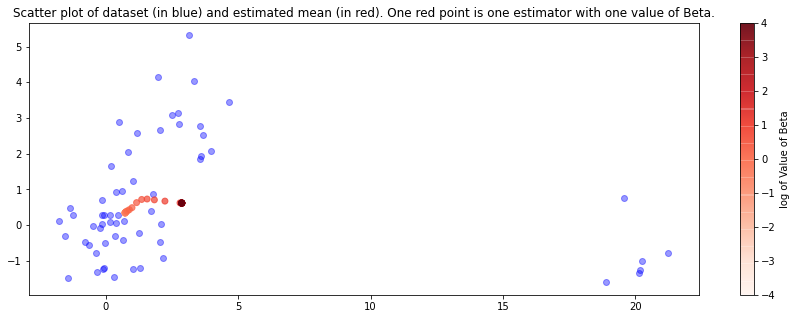

In [12]:
fig, ax = plt.subplots(figsize=(15,5))

# define the estimators
estimated_values = []
for beta in np.logspace(-4,4):
    estimator = M_estimator(beta, name, p=4)
    estimated_values += [estimator.estimate(X)]

plt.scatter(X[:,0],X[:,1],alpha = 0.4, c='b')    
im = plt.scatter(np.array(estimated_values)[:,0], 
            np.array(estimated_values)[:,1], 
            cmap = plt.get_cmap('Reds'), 
            c = np.linspace(-4,4), alpha = 0.7)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('log of Value of Beta')


ax.set_title('Scatter plot of dataset (in blue) and estimated mean (in red).'
             ' One red point is one estimated value with one value of Beta.')

plt.show()